In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [569]:
remote_file_name = "https://pcrj.maps.arcgis.com/sharing/rest/content/items/754cc0698129404ba8bfb053cbdbd158/data"
covid_file = os.path.join("covid_19_rj.csv")
urllib.request.urlretrieve(remote_file_name, covid_file) 

('covid_19_rj.csv', <http.client.HTTPMessage at 0x199d2726198>)

In [570]:
def predict_encoding(file_path, n_lines=20):
    '''Predict a file's encoding using chardet'''
    import chardet
    with open(file_path, 'rb') as f:
        rawdata = b''.join([f.readline() for _ in range(n_lines)])

    return chardet.detect(rawdata)['encoding']

In [571]:
df = pd.read_csv(covid_file,sep=';',encoding=predict_encoding(covid_file))

In [572]:
df.shape

(56060, 11)

In [573]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', df.shape[1])

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56060 entries, 0 to 56059
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   classificação_final    56060 non-null  object
 1   dt_notific             56031 non-null  object
 2   dt_inicio_sintomas     56025 non-null  object
 3   bairro_resid__estadia  56060 non-null  object
 4   ap_residencia_estadia  56060 non-null  object
 5   sexo                   56060 non-null  object
 6   faixa_etária           56060 non-null  object
 7   evolução               56060 non-null  object
 8   dt_óbito               6393 non-null   object
 9   raça/cor               56060 non-null  object
 10  Data_atualização       56060 non-null  object
dtypes: object(11)
memory usage: 4.7+ MB


In [575]:
df.columns = ['classificacao', 'dt_notificacao', 'dt_inicio_sintomas','bairro', 'area_planejamento', 
              'sexo', 'faixa_etaria', 'evolucao', 'dt_obito', 'raca_cor', 'data_atualizacao']

In [576]:
print("Última atualização: {}".format(df.describe().data_atualizacao.top))

Última atualização: 28/06/2020


In [577]:
df.describe()

,classificacao,dt_notificacao,dt_inicio_sintomas,bairro,area_planejamento,sexo,faixa_etaria,evolucao,dt_obito,raca_cor,data_atualizacao
count,56060,56031,56025,56060,56060,56060,56060,56060,6393,56060,56060
unique,1,109,136,162,11,2,14,3,100,6,1
top,CONFIRMADO,17/06/2020,20/04/2020,INDEFINIDO,2.1,F,De 40 a 49,recuperado,30/04/2020,Ignorado,28/06/2020
freq,56060,1656,1918,3987,9327,29524,12034,48248,198,24109,56060


In [601]:
#Limpeza e padronização de dados inválidos
df = df.replace('Missing', np.NaN)
df = df.replace('Ignorado','INDEFINIDO')
df = df.replace('N/D','INDEFINIDO')
df = df.replace('#N/D','INDEFINIDO')
df = df.replace('ND','INDEFINIDO')

In [602]:
#Conversão colunas datas
df['dt_notificacao'] =  pd.to_datetime(df['dt_notificacao'], format='%d/%m/%Y')
df['dt_inicio_sintomas'] =  pd.to_datetime(df['dt_inicio_sintomas'], format='%d/%m/%Y')
df['dt_obito'] =  pd.to_datetime(df['dt_obito'], format='%d/%m/%Y')
df['data_atualizacao'] =  pd.to_datetime(df['data_atualizacao'], format='%d/%m/%Y')

In [664]:
pd.DataFrame(df.groupby(['dt_notificacao','evolucao']).classificacao.count()).pivot_table(columns='evolucao',index='dt_notificacao').tail()

classificacao                 
evolucao               ativo recuperado óbito
dt_notificacao                               
2020-06-24             117.0      594.0   3.0
2020-06-25             133.0      547.0   1.0
2020-06-26             106.0      336.0   4.0
2020-06-27              91.0      143.0   NaN
2020-06-28              11.0       22.0   NaN

In [662]:
df[df['dt_notificacao'] == '2020-05-24'].groupby(['evolucao']).classificacao.count()

evolucao
recuperado    588
óbito          30
Name: classificacao, dtype: int64

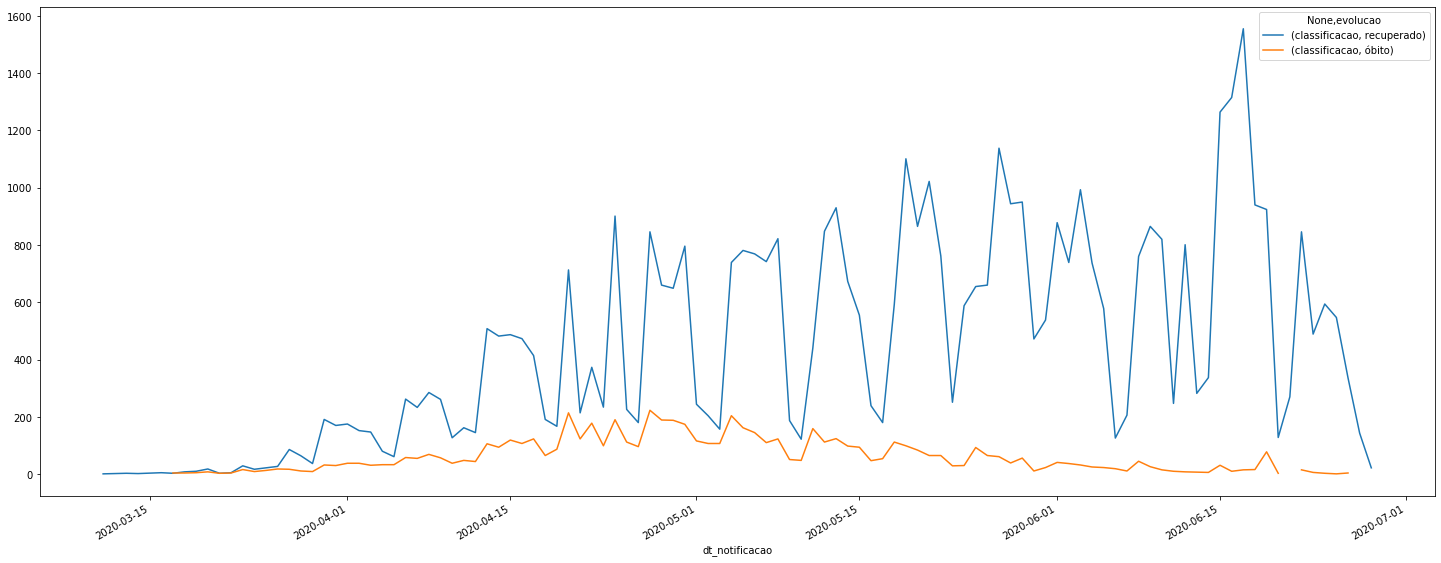

In [683]:
pd.DataFrame(df[df['evolucao'] != 'ativo'].groupby(['dt_notificacao','evolucao']).classificacao.count()).\
pivot_table(columns='evolucao',index='dt_notificacao').sort_index().plot(figsize=(25,10));

In [553]:
df[df["bairro"] == 'BANGU'].sort_values(['dt_notificacao','faixa_etaria','sexo','evolucao'])

,classificacao,dt_notificacao,dt_inicio_sintomas,bairro,area_planejamento,sexo,faixa_etaria,evolucao,dt_obito,raca_cor,data_atualizacao
49423,CONFIRMADO,2020-03-23,2020-03-20,BANGU,5.1,F,De 40 a 49,recuperado,NaN,Ignorado,2020-06-28
52017,CONFIRMADO,2020-03-24,2020-03-20,BANGU,5.1,M,De 40 a 49,recuperado,NaN,Ignorado,2020-06-28
52018,CONFIRMADO,2020-03-24,2020-03-20,BANGU,5.1,M,De 40 a 49,recuperado,NaN,Ignorado,2020-06-28
68,CONFIRMADO,2020-03-25,2020-03-23,BANGU,5.1,F,De 40 a 49,recuperado,NaN,Ignorado,2020-06-28
46223,CONFIRMADO,2020-03-27,2020-03-23,BANGU,5.1,M,De 50 a 59,óbito,02/04/2020,Preta,2020-06-28
...,...,...,...,...,...,...,...,...,...,...,...
42540,CONFIRMADO,2020-06-26,2020-06-15,BANGU,5.1,F,De 60 a 69,ativo,NaN,Parda,2020-06-28
42237,CONFIRMADO,2020-06-27,2020-06-15,BANGU,5.1,F,De 20 a 29,ativo,NaN,Parda,2020-06-28
42177,CONFIRMADO,2020-06-27,2020-06-15,BANGU,5.1,F,De 30 a 39,ativo,NaN,Amarela,2020-06-28
42328,CONFIRMADO,2020-06-27,2020-05-01,BANGU,5.1,F,De 30 a 39,recuperado,NaN,Branca,2020-06-28


In [376]:
pd.DataFrame(df[df['bairro'] == 'BANGU'].groupby(['dt_notificacao','bairro','evolucao']).classificacao.count().cumsum()).reset_index().sort_values(['classificacao'], ascending=False)

,dt_notificacao,bairro,evolucao,classificacao
176,2020-06-26,BANGU,recuperado,1487
175,2020-06-25,BANGU,recuperado,1486
174,2020-06-25,BANGU,ativo,1477
173,2020-06-24,BANGU,recuperado,1471
172,2020-06-24,BANGU,ativo,1457
...,...,...,...,...
4,2020-03-27,BANGU,óbito,6
3,2020-03-27,BANGU,recuperado,5
2,2020-03-25,BANGU,recuperado,4
1,2020-03-24,BANGU,recuperado,3


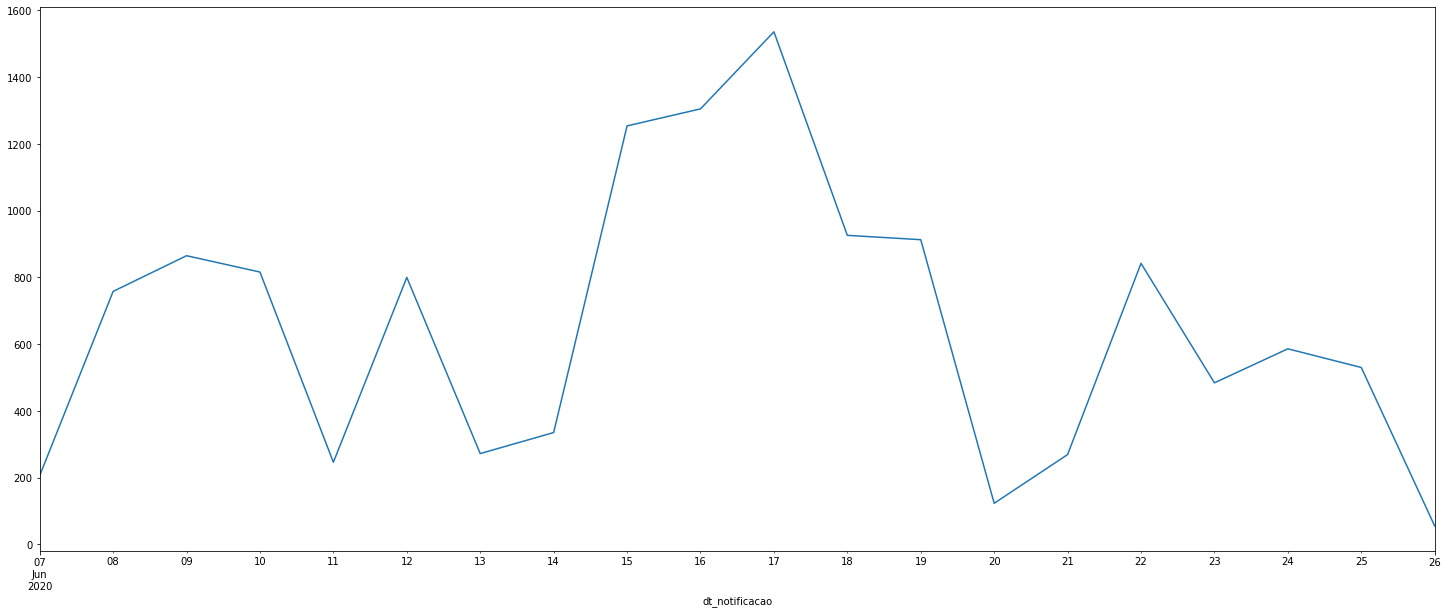

In [316]:
df[df['evolucao'] == 'recuperado'].groupby(['dt_notificacao']).classificacao.count().tail(20).plot(kind='line',figsize=(25,10))

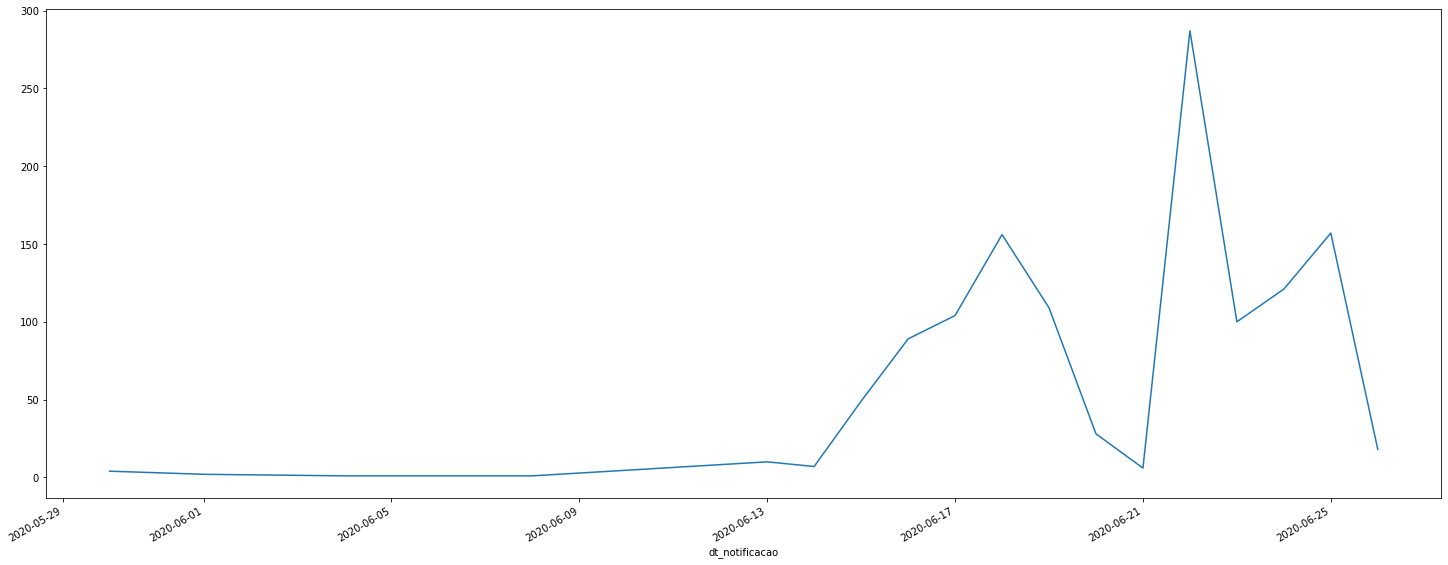

In [318]:
df[df['evolucao'] == 'ativo'].groupby(['dt_notificacao']).classificacao.count().tail(20).plot(kind='line',figsize=(25,10))

In [171]:
pd.pivot_table(aux, values='classificacao', index=['evolucao'], columns=['faixa_etaria'])

faixa_etaria,#N/D,De 0 a 9,De 10 a 19,De 100 a 109,De 110 a 119,De 20 a 29,De 30 a 39,De 40 a 49,De 50 a 59,De 60 a 69,De 70 a 79,De 80 a 89,De 90 a 100,N/D
evolucao,,,,,,,,,,,,,,
ativo,NaN,15.0,19.0,1.0,NaN,157.0,320.0,284.0,228.0,149.0,70.0,50.0,26.0,NaN
recuperado,1.0,475.0,594.0,48.0,1.0,4812.0,11345.0,11095.0,8347.0,5329.0,3104.0,1861.0,586.0,3.0
óbito,NaN,14.0,10.0,11.0,NaN,71.0,193.0,501.0,829.0,1447.0,1567.0,1281.0,442.0,NaN


In [ ]:
df.query('evolucao == "óbito"').groupby(['raca_cor','evolucao'])['classificacao'].count()

In [103]:
covid_bairro_rj.sort_values(by='bairro_resid__estadia',ascending=False)

,bairro_resid__estadia
INDEFINIDO,3960
COPACABANA,2326
BARRA DA TIJUCA,2260
CAMPO GRANDE,2093
TIJUCA,2019
...,...
PAQUETA,16
CAMPO DOS AFONSOS,12
COMPLEXO DO ALEMAO,11
JOA,10
